In [1]:
from utilities import * 
import GetTranscription

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\backend\utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


In [2]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
libri_train ="E:\Datasets\Voice\LibriSpeech"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/but bowl.wav"

In [3]:
clips =fcs.get_audio_files(libri_train)
len(clips)

28539

clips in dataset:  28539
hop_length:  80
transcription:  HAD IT BEEN ANY OTHER MAN IN AVONLEA MISSUS RACHEL DEFTLY PUTTING THIS AND THAT TOGETHER MIGHT HAVE GIVEN A PRETTY GOOD GUESS AS TO BOTH QUESTIONS BUT MATTHEW SO RARELY WENT FROM HOME THAT IT MUST BE SOMETHING PRESSING AND UNUSUAL WHICH WAS TAKING HIM
words:  46
(243040,)


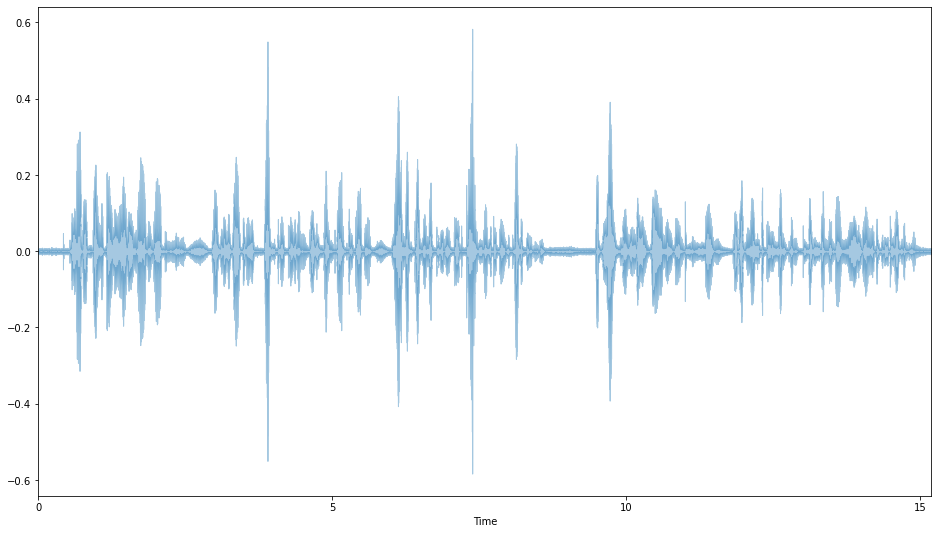

In [40]:
plt.figure(figsize=(16,9))
sr = 16000
hop_length = int(sr/200)
frame_length = int(hop_length*2)
min_duration=hop_length*10

clips = fcs.get_audio_files(libri_train)
clip = clips[12]
audio, sr = librosa.load(clip, sr=sr)
transcription = GetTranscription.get_file_transcript(clip)
print("clips in dataset: ", len(clips))
print("hop_length: " ,hop_length)
print("transcription: ", transcription)
print("words: ", len(transcription.split(" ")))
print(audio.shape)
librosa.display.waveplot(audio,sr=sr,alpha=0.4)
ipd.Audio(audio, rate=sr)

In [ ]:
def load_clip(clip_address, sr):
    audio, sr = librosa.load(clip_address, sr=sr)
    return audio
def load_clip_transcription(clip_address):
    transcription = GetTranscription.get_file_transcript(clip_address)
    return transcription

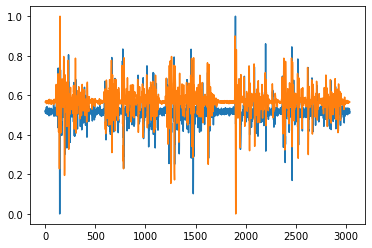

In [41]:
f = librosa.feature.rms(audio,hop_length=hop_length, frame_length= frame_length).flatten()
d = librosa.feature.delta(f)
rmse_diff = np.zeros_like(f)
rmse_diff[1:] = np.diff(f)
d_diff = np.zeros_like(d)
d_diff[1:] = np.diff(d)

plt.plot(normalize(rmse_diff))
plt.plot(normalize(d_diff))

In [42]:
audio.shape
#n.shape
hop_length

80

In [73]:
#Split by silence

from energy_split import *
def split_into_segments(audio,hop_length,frame_length,sr,min_voiced_duration_ms=50, energy_threshold=0.05):
    segments = Split(audio,hop_length,frame_length,sr = sr ,min_duration, energy_threshold)
    return segments
print(len(segments))
print(segments)

total = 0
for x in segments:
    total += x[1]-x[0]
print("...",total)
audio.shape

50
[[8880, 11760], [11920, 13200], [14800, 17440], [18400, 33280], [36160, 38560], [44480, 48880], [49520, 52160], [52720, 54720], [56400, 58480], [61360, 63120], [65600, 66720], [68240, 72800], [72960, 76240], [77600, 80000], [81120, 82960], [86160, 87840], [88640, 90240], [93520, 99520], [99680, 101040], [102320, 104080], [104320, 107120], [109280, 110160], [110320, 111920], [113040, 114480], [116400, 119360], [119840, 120720], [121040, 122160], [125440, 127120], [129520, 130800], [151680, 152640], [153440, 157120], [158880, 165680], [166720, 172480], [173120, 175440], [177840, 179120], [179280, 181040], [181360, 183680], [183840, 185440], [189280, 190160], [190560, 191840], [192400, 196080], [198320, 200240], [200480, 203280], [209600, 210640], [212960, 216240], [216880, 223760], [224240, 227280], [230240, 231120], [231680, 234080], [234880, 235840]]
... 132720


(243040,)

In [97]:
print(get_phonemes_for_word("computer"))

MatchPhonesToText("kəmpju:ter")

kəmpjuːtɐ


[]

In [74]:
from m_dictionary import *
def all_phones_to_array(transcription):
    clip_phones = get_phonemes_for_sentence(sentence = transcription)
    phone_array = []
    for word in clip_phones:
        if len(word) == word.count(' '):
            phone_array.append('XXXXXX')
        if len(word) != word.count(' '):
            #print(len(word))
            #print(word)
            for char in word:
                if char =='ː':
                    phone_array[-1] = phone_array[-1]+char
                else:
                    phone_array.append(char)
    return phone_array
print(phone_array)
print(transcription)
print(sectionphones)
len(phone_array)

['h', 'æ', 'd', 'ɪ', 't', 'b', 'iː', 'n', 'ɛ', 'n', 'i', 'ʌ', 'ð', 'ɐ', 'm', 'æ', 'n', 'ɪ', 'n', 'XXXXXX', 'm', 'ɪ', 's', 'ə', 's', 'ɹ', 'e', 'ɪ', 't', 'ʃ', 'ə', 'ɫ', 'd', 'ɛ', 'f', 't', 'l', 'i', 'p', 'ə', 't', 'ɪ', 'ŋ', 'ð', 'ɪ', 's', 'æ', 'n', 'd', 'ð', 'æ', 't', 't', 'ə', 'ɡ', 'ɛ', 'ð', 'ɐ', 'm', 'a', 'ɪ', 't', 'h', 'æ', 'v', 'ɡ', 'ɪ', 'v', 'ə', 'n', 'e', 'ɪ', 'p', 'ɹ', 'ɪ', 't', 'i', 'ɡ', 'ʊ', 'd', 'ɡ', 'ɛ', 's', 'æ', 'z', 't', 'uː', 'b', 'ə', 'ʊ', 'θ', 'k', 'w', 'ɛ', 's', 't', 'ʃ', 'ə', 'n', 'z', 'b', 'ʌ', 't', 'm', 'æ', 'θ', 'j', 'u', 's', 'ə', 'ʊ', 'ɹ', 'e', 'ə', 'l', 'i', 'w', 'ɛ', 'n', 't', 'f', 'ɹ', 'ɒ', 'm', 'h', 'ə', 'ʊ', 'm', 'ð', 'æ', 't', 'ɪ', 't', 'm', 'ʌ', 's', 't', 'b', 'iː', 's', 'ʌ', 'm', 'θ', 'ɪ', 'ŋ', 'p', 'ɹ', 'ɛ', 's', 'ɪ', 'ŋ', 'æ', 'n', 'd', 'ʌ', 'n', 'j', 'uː', 'ʒ', 'uː', 'ə', 'l', 'w', 'ɪ', 't', 'ʃ', 'w', 'ɒ', 'z', 't', 'e', 'ɪ', 'k', 'ɪ', 'ŋ', 'h', 'ɪ', 'm']
HAD IT BEEN ANY OTHER MAN IN AVONLEA MISSUS RACHEL DEFTLY PUTTING THIS AND THAT TOGETHER MIGHT HAVE

178

In [47]:
def all_phoneme_Sections_in_clip(segments):
    all_bits = []
    for segment in segments:
        starting = segment[0]
        segment_boundaries = Split2(audio[starting:segment[1]], hop_length=hop_length, frame_length=frame_length, sr= sr, min_duration=hop_length*10)
        for bit in segment_boundaries:
            x1 =starting+bit[0]
            x2 =starting+bit[1]
            b = (x1,x2)
            all_bits.append(b)
    return all_bits
print(all_bits)
print("segmented phones: ", len(all_bits),"transcription phones: ",len(phone_array))
print(np.median([x[1]-x[0] for x in all_bits]))   

[(8480, 10006), (10006, 11618), (11618, 13280), (13680, 14480), (14720, 15677), (15677, 16719), (16719, 17520), (18240, 19319), (19319, 20619), (20619, 21442), (21442, 22294), (22294, 23353), (23353, 24173), (24173, 24973), (24973, 25887), (25887, 26725), (26725, 27629), (27629, 28692), (28692, 29492), (29492, 30454), (30454, 31316), (31316, 33360), (34000, 34827), (34827, 35636), (35636, 36436), (36436, 37239), (37239, 38039), (38039, 38862), (38862, 39920), (41440, 42257), (42257, 43061), (43061, 43869), (43869, 44960), (47120, 47924), (47924, 49120), (49440, 50258), (50258, 51078), (51078, 52160), (52720, 53763), (53763, 54880), (55520, 56388), (56388, 58640), (59040, 59844), (59844, 60645), (60645, 61552), (61552, 63200), (65600, 66800), (67920, 68878), (68878, 70020), (70020, 70843), (70843, 71799), (71799, 73200), (73680, 74558), (74558, 75375), (75375, 76480), (77600, 78477), (78477, 80080), (81120, 82055), (82055, 83040), (84320, 85520), (86160, 87093), (87093, 87920), (88640, 

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


In [70]:
def clip_from_segments(segments):
    voiced = []
    for x in segments:
        silenced[x[0]:x[1]] = audio[x[0]:x[1]]
        for i in audio[x[0]:x[1]]:
            voiced.insert( len(voiced),i )
    voiced = np.array(voiced)
    print(voiced.shape)
    return voiced
audio_voiced = clip_from_segments(segments)
ipd.Audio(audio_voiced,rate=sr)

(164000,)
transcription:  HAD IT BEEN ANY OTHER MAN IN AVONLEA MISSUS RACHEL DEFTLY PUTTING THIS AND THAT TOGETHER MIGHT HAVE GIVEN A PRETTY GOOD GUESS AS TO BOTH QUESTIONS BUT MATTHEW SO RARELY WENT FROM HOME THAT IT MUST BE SOMETHING PRESSING AND UNUSUAL WHICH WAS TAKING HIM


(2800,)
[14720, 17520]


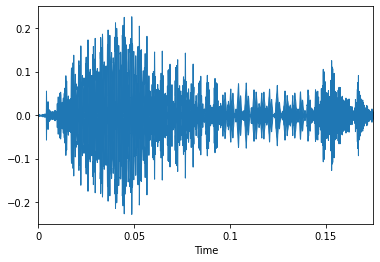

In [64]:
# checking segment audio
selected = 2
section = segments[selected]
section_data = audio[section[0]:section[1]]
print(section_data.shape)
print(section)

normed = normalize(librosa.feature.rms(audio[section[0]:section[1]], hop_length=hop_length,
                            frame_length=frame_length).flatten())
librosa.display.waveplot(section_data, sr=sr)
ipd.Audio(section_data, rate=sr)


In [65]:
#split by rate of change of energy
section = segments[selected]
part = audio[section[0]:section[1]]
phone_boundaries = Split2(part, hop_length=hop_length, frame_length=frame_length, sr= sr, min_duration=hop_length*10)
print(len(part))
#phone_boundaries.append(len(part))
print(hop_length*6)
print(part.shape)
print(phone_boundaries)
print(len(phone_boundaries))

2800
480
(2800,)
[[0, 957], [957, 1999], [1999, 2800]]
3


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


In [12]:
phone_boundaries[-1]

[3392, 4400]

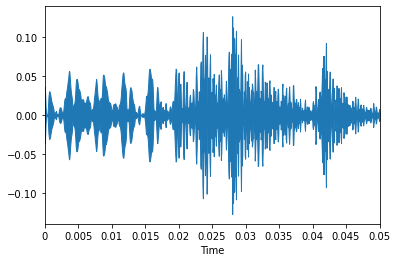

In [68]:
mnum =2
librosa.display.waveplot(part[phone_boundaries[mnum][0]:phone_boundaries[mnum][1]], sr=sr)
ipd.Audio(part[phone_boundaries[mnum][0]:phone_boundaries[mnum][1]], rate=sr)


4400
(4400,)
4400


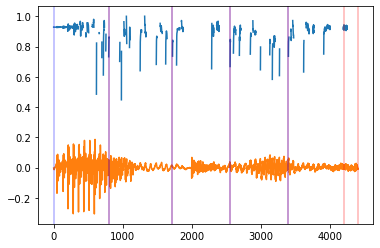

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1400
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: Matplotl

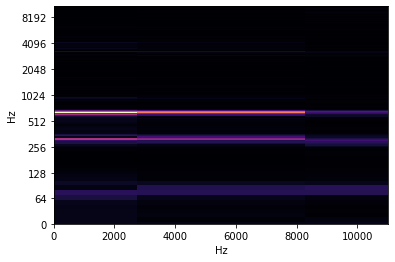

In [14]:
section = segments[selected]
part = audio[section[0]:section[1]]
e =librosa.pcen(part,hop_length=hop_length)
d = normalize(librosa.feature.delta(e))
print(len(e))
print(part.shape)
print(len(d))
#librosa.display.waveplot(part)
plt.plot(d)
plt.plot(part)
a = 2800
b = 4200
for x in phone_boundaries:
    plt.axvline(x=x[0], ymin=-0.4, ymax=1, c='b', alpha=0.3)
    plt.axvline(x=x[1], ymin=-0.4, ymax=1, c='r', alpha=0.3)
plt.axvline(x=b, ymin=-0.4, ymax=1, c='r', alpha=0.3)
plt.show()
stft = librosa.stft(part[a:b])
librosa.display.specshow(stft, y_axis="log", x_axis="linear")
ipd.Audio(part[a:b], rate =sr)

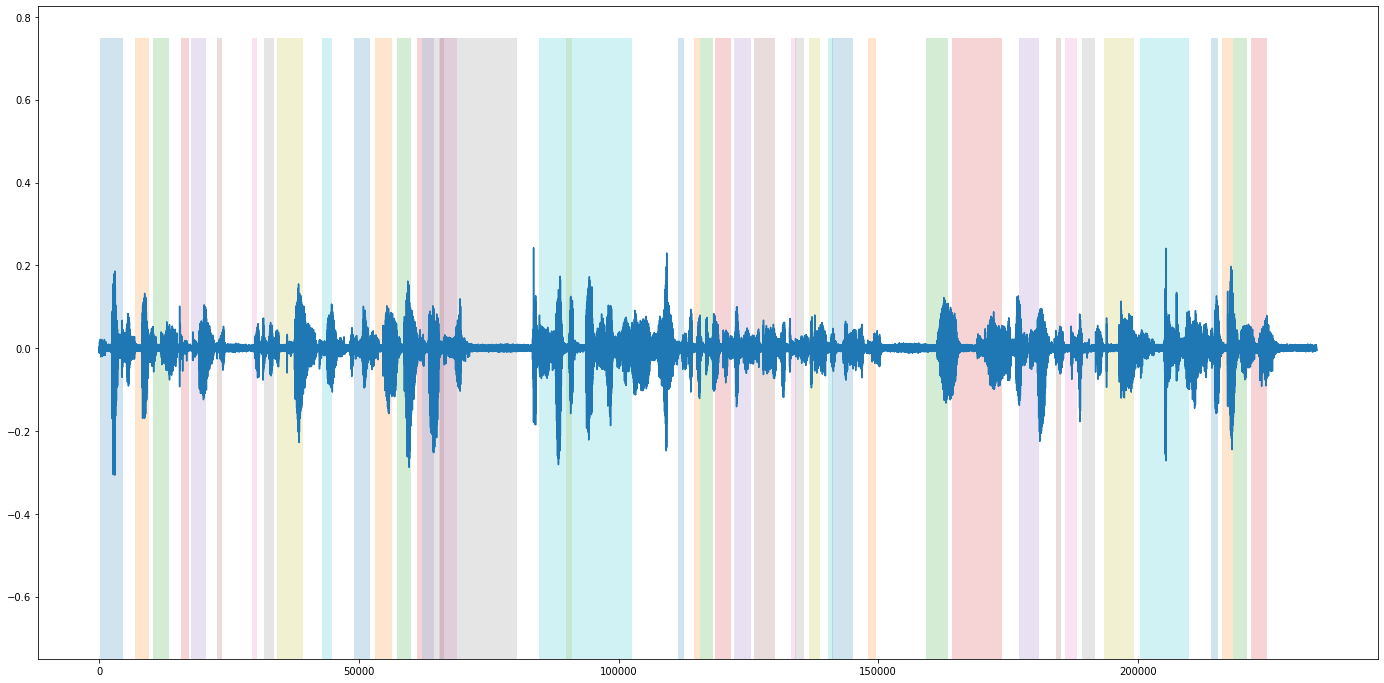

In [15]:
plt.figure(figsize=(24,12))
plt.plot(audio)
for x in segments:
    x1 = x[0]
    x2 = x[1]
    plt.bar(x1, height=1.5, width=(x2-x1), bottom=-0.75, alpha=0.2)
    

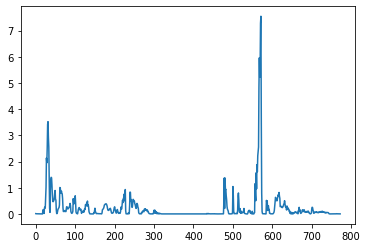

In [32]:
e2 = np.array([
    sum(abs(audio[i:i+frame_length]**2))
    for i in range(0, len(audio), frame_length)
])

audio.shape[0]/e2.shape[0]
plt.plot(e2)

In [90]:
segments_librosa = librosa.effects.split(audio,  frame_length=2048, hop_length=220)
voiced_libr = []
for x in segments_librosa:
    silenced[x[0]:x[1]] = audio[x[0]:x[1]]
    for i in audio[x[0]:x[1]]:
        voiced_libr.insert( len(voiced_libr),i )
voiced_libr = np.array(voiced_libr)
print(voiced_libr.shape)


print("transcription: ", transcription)
ipd.Audio(voiced,rate=sr)

(234480,)
transcription:  AND HIS BEST SUIT OF CLOTHES WHICH WAS PLAIN PROOF THAT HE WAS GOING OUT OF AVONLEA AND HE HAD THE BUGGY AND THE SORREL MARE WHICH BETOKENED THAT HE WAS GOING A CONSIDERABLE DISTANCE NOW WHERE WAS MATTHEW CUTHBERT GOING AND WHY WAS HE GOING THERE


1.0


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


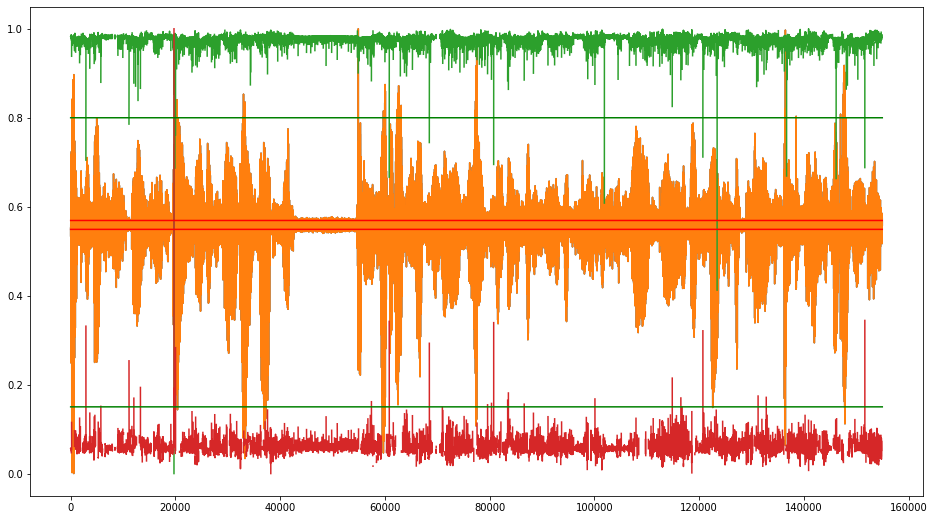

In [91]:
plt.figure(figsize=(16,9))
scaled_audio= (sklearn.preprocessing.minmax_scale(voiced, axis=0))
audio_range =  np.max(scaled_audio)- np.min(scaled_audio)
mean =np.mean(scaled_audio)
print(audio_range)
y = np.full(len(voiced),mean-audio_range*0.01) #audio non silence min
y1 = np.full(len(voiced),mean+audio_range*0.01) #audio non silence max
y2 = np.full(len(voiced),0.8)
y3 = np.full(len(voiced),0.15)
energy = librosa.pcen(np.array(voiced))
delta_energy = librosa.feature.delta(energy)
delta_energy2 = librosa.feature.delta(delta_energy)

plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) # blue
plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) #yellow
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy, axis=0)) #green
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))
plt.plot(y,c='r')
plt.plot(y1,c='r')
plt.plot(y2,c='g')
plt.plot(y3,c='g')
#plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))




(1025, 2932)


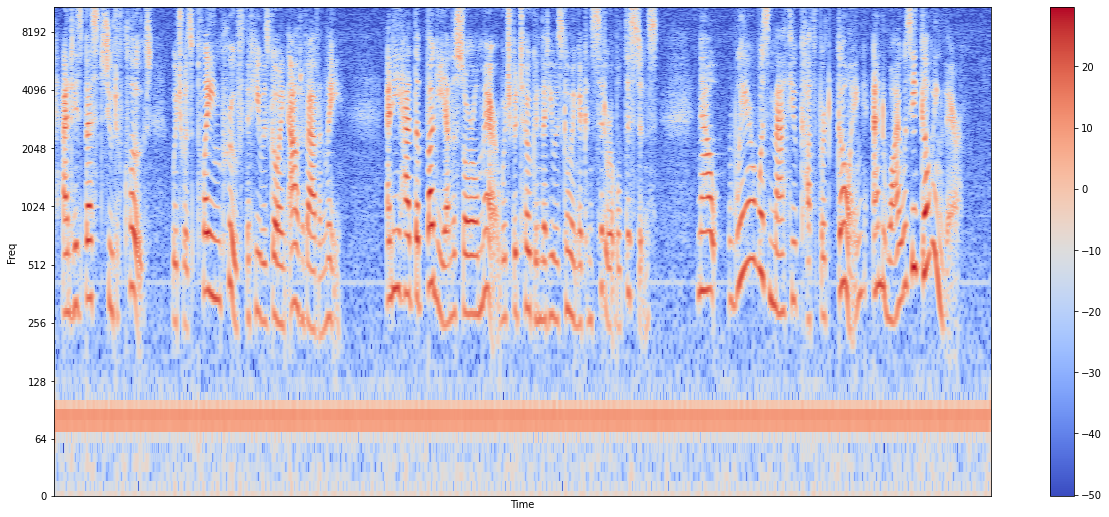

In [96]:
stft = librosa.stft(np.array(audio), hop_length=hop_length)
print(stft.shape)
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram

plt.figure(figsize=(21,9))
librosa.display.specshow(log_spectogram, y_axis='log')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()

In [2]:
def reduce_noise_centroid_s(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

    y_cleaned = less_noise(y)

    return y_cleaned

In [50]:
from scipy import signal
def f_high(y,sr):
    b,a = signal.butter(1, 2000/(sr/2), btype='lowpass')
    yf = signal.lfilter(b,a,y)
    return yf
yf1 = f_high(audio, sr)
ipd.Audio(yf1,rate=sr)

In [51]:
audio = yf1

In [ ]:
a_file= open("test.txt","w")
np.savetxt(a_file, three)
a_file.close()